# Notebook : Figures for paper "Characterization of internal tide non-stationarity : Eulerian versus Lagrangian perspectives"

Every figure found in the paper (plus supplements)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
import os
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec



In [2]:
path = '/Users/zcaspar/codes/Diagnostics2/'
dsv1 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80.nc'))] #local
dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2_b*'))] #local
#dsv2 = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_param_fit_T80_v2.nc'))] #local

In [3]:
#Model fitted
def myfit(tau,Tt,Xt_ns,Xt_s,Tb,Xb,Omega):
    return np.cos(omega*tau)*(Xt_s+Xt_ns*np.exp(-tau/Tt))+Xb*np.cos(2*np.pi*Omega*tau)*np.exp(-tau/Tb)

In [4]:
tau = np.arange(0,40,10/(24*60))
omega = 2*np.pi*2
Tau = xr.DataArray(tau,dims='tau',coords={'tau':tau})

In [5]:
ce = 'lightseagreen'
cl = 'firebrick'

In [6]:
# Autocorrelatoin from data
corrE = xr.open_dataset(path+'wp7/'+'ZC_Eulerian_corr_80avg1d.nc').rename({'lags':'lag'})
corrL = xr.open_dataset(path+'wp7/'+'ZC_drifters_corr_80avg1d.nc')

In [7]:
for v in ['uu','vv']:
    corrE[v+'_normalized'] = corrE[v]/corrE[v].sel(lag=0)
    corrL[v+'_normalized'] = corrL[v]/corrL[v].sel(lag=0)
for v in ['uv','vu']:#
    corrE[v+'_normalized'] = corrE[v]/np.sqrt(corrE['uu'].sel(lag=0)*corrE['vv'].sel(lag=0))
    corrL[v+'_normalized'] = corrL[v]/np.sqrt(corrL['uu'].sel(lag=0)*corrL['vv'].sel(lag=0))


In [8]:
#Autocvariance and autocorrelation from fit
fit_E,fit_L = {}, {}
fit_E['vv'] = myfit(Tau,dsv2[-2]['E_v_avg'].sel(param='Tt'),dsv2[-2]['E_v_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['E_v_avg'].sel(param='Xt_s'),dsv2[-2]['E_v_avg'].sel(param='Tb'),
                    dsv2[-2]['E_v_avg'].sel(param='Xb'),dsv2[-2]['E_v_avg'].sel(param='Omega')
                   )

fit_E['uu'] = myfit(Tau,dsv2[-2]['E_u_avg'].sel(param='Tt'),dsv2[-2]['E_u_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['E_u_avg'].sel(param='Xt_s'),dsv2[-2]['E_u_avg'].sel(param='Tb'),
                    dsv2[-2]['E_u_avg'].sel(param='Xb'),dsv2[-2]['E_u_avg'].sel(param='Omega')
                   )

fit_L['vv'] = myfit(Tau,dsv2[-2]['L_v_avg'].sel(param='Tt'),dsv2[-2]['L_v_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['L_v_avg'].sel(param='Xt_s'),dsv2[-2]['L_v_avg'].sel(param='Tb'),
                    dsv2[-2]['L_v_avg'].sel(param='Xb'),dsv2[-2]['L_v_avg'].sel(param='Omega')
                   )

fit_L['uu'] = myfit(Tau,dsv2[-2]['L_u_avg'].sel(param='Tt'),dsv2[-2]['L_u_avg'].sel(param='Xt_ns'),
                    dsv2[-2]['L_u_avg'].sel(param='Xt_s'),dsv2[-2]['L_u_avg'].sel(param='Tb'),
                    dsv2[-2]['L_u_avg'].sel(param='Xb'),dsv2[-2]['L_u_avg'].sel(param='Omega')
                   )


In [9]:
for v in ['uu','vv']:
    fit_E[v+'_normalized'] = fit_E[v]/fit_E[v].sel(tau=0)
    fit_L[v+'_normalized'] = fit_L[v]/fit_L[v].sel(tau=0)


### Figure 4 :


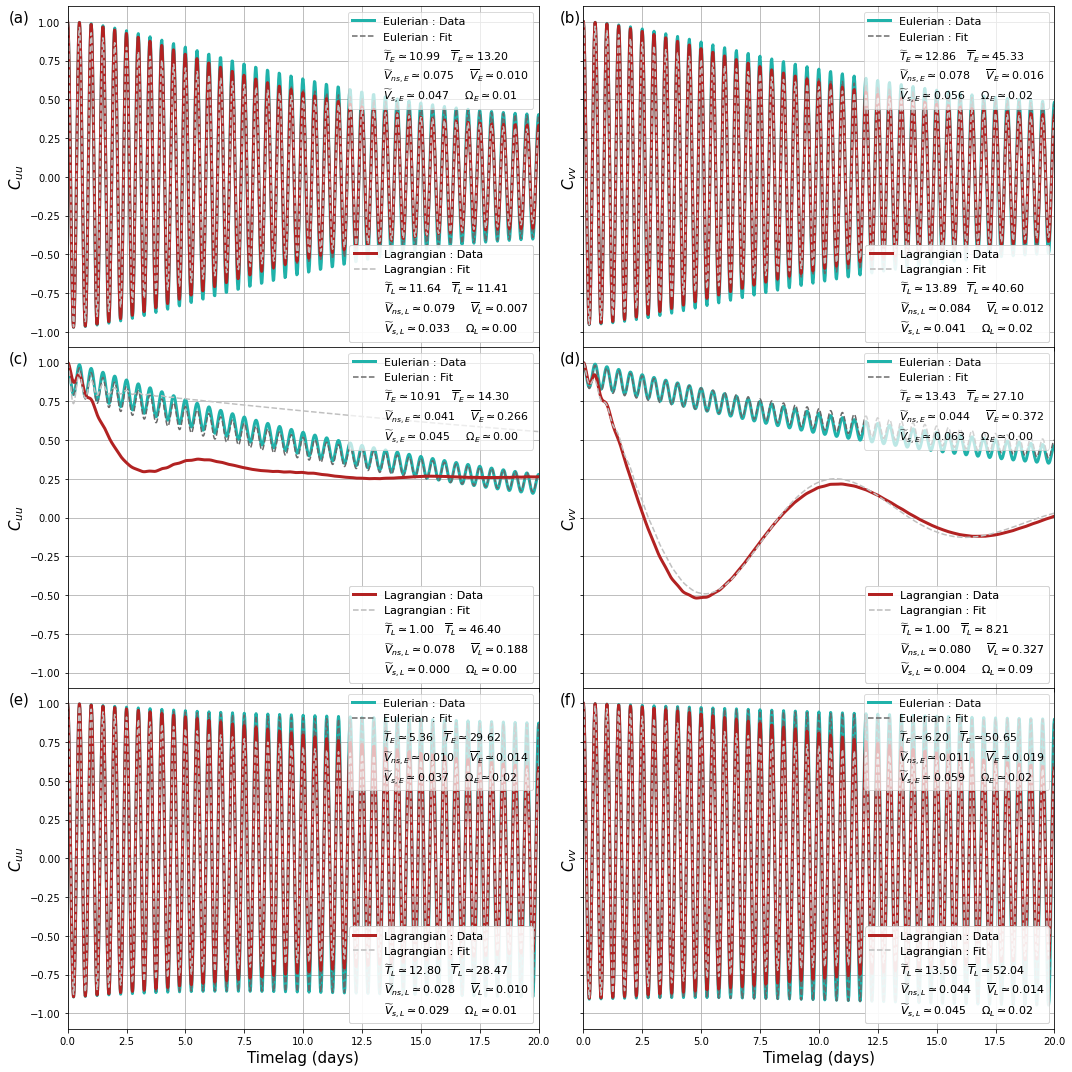

In [10]:
import matplotlib as mpl
from matplotlib.patches import Rectangle

ce_fit = 'dimgrey'
cl_fit='silver'
#Sections
Y=[2300,1425,700]

props = dict(boxstyle='round', facecolor='w', alpha=0.5)

# place a text box in upper left in axes coords


fig,axs = plt.subplots(3,2,figsize=(15,15),sharex=True, sharey=True,gridspec_kw={'hspace': 0})
for i,y in enumerate(Y):
    for V,ax in zip(['uu','vv'],axs[i,:]):
        paE = dsv2[-2]['E_'+V[0]+'_avg'].sel(ybin=y,method='nearest').values
        paL = dsv2[-2]['L_'+V[0]+'_avg'].sel(ybin=y,method='nearest').values
        textstrE = '\n'.join((
            r'$\widetilde{T}_E\simeq%.2f\hspace{1}\overline{T}_E\simeq%.2f$' % (paE[0], paE[3]),
            r'$\widetilde{V}_{ns,E}\simeq%.3f\hspace{1.5}\overline{V}_E\simeq%.3f$' % (np.sqrt(paE[1]/2),np.sqrt(paE[4])),
            r'$\widetilde{V}_{s,E}\simeq%.3f\hspace{1.5}\Omega_E\simeq%.2f$'% (np.sqrt(paE[2]/2),paE[5])
                            ))
        textstrL = '\n'.join((
            r'$\widetilde{T}_L\simeq%.2f\hspace{1}\overline{T}_L\simeq%.2f$' % (paL[0], paL[3]),
            r'$\widetilde{V}_{ns,L}\simeq%.3f\hspace{1.5}\overline{V}_L\simeq%.3f$' % (np.sqrt(paL[1]),np.sqrt(paL[4])),
            r'$\widetilde{V}_{s,L}\simeq%.3f\hspace{1.5}\Omega_L\simeq%.2f$'% (np.sqrt(paL[2]),paL[5])
                            ))
        corrE[V+'_normalized'].sel(y_bins=y*1e3,method='nearest').plot(c=ce,linewidth = 3,ax=ax,label=('Eulerian : Data'))
        fit_E[V+'_normalized'].sel(ybin=y,method='nearest').plot(c = ce_fit,linestyle='--',ax=ax,label=('Eulerian : Fit'))
        corrL[V+'_normalized'].sel(y_bins=y,method='nearest').plot(c=cl,linewidth = 3,ax=ax,label=('Lagrangian : Data'))
        fit_L[V+'_normalized'].sel(ybin=y,method='nearest').plot(c=cl_fit,linestyle='--',ax=ax,label=('Lagrangian : Fit'))
        handles,labels = ax.get_legend_handles_labels()
        extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
        legendE = ax.legend(handles[:2]+[extra],labels[:2]+[textstrE],loc='upper right',framealpha=0.7,fontsize=11);
        ax.add_artist(legendE)
        legendL = ax.legend(handles[2:]+[extra],labels[2:]+[textstrL],loc='lower right',framealpha=0.7,fontsize=11)
        ax.add_artist(legendL)
        ax.set_ylim(-1.1,1.1);ax.grid();ax.set_title('')
        ax.set_ylabel(r'$C_{%s}$'%V,fontsize=15);ax.set_xlabel('Timelag (days)',fontsize=15)
        ax.set_xlim(0,20)
        
fig.tight_layout()
for ax,txt in zip(axs[:,0],['(a)','(c)','(e)']):
    ax.text(-2.5,1,txt,fontsize=15)
for ax,txt in zip(axs[:,1],['(b)','(d)','(f)']):
    ax.text(-1.,1,txt,fontsize=15)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure4.pdf',bbox_inches='tight')



Caption : Normalized autocorrelation at fixed bin in three different area : north (a and b), center (c and d) and south (e and f) of the domain). The eulerian and lagrangian autocorrelation derived from our data are represented respectively in blue and red. The best fits found with our theoretical model are plotted in grey dashed lines.

### Figure 5 : 


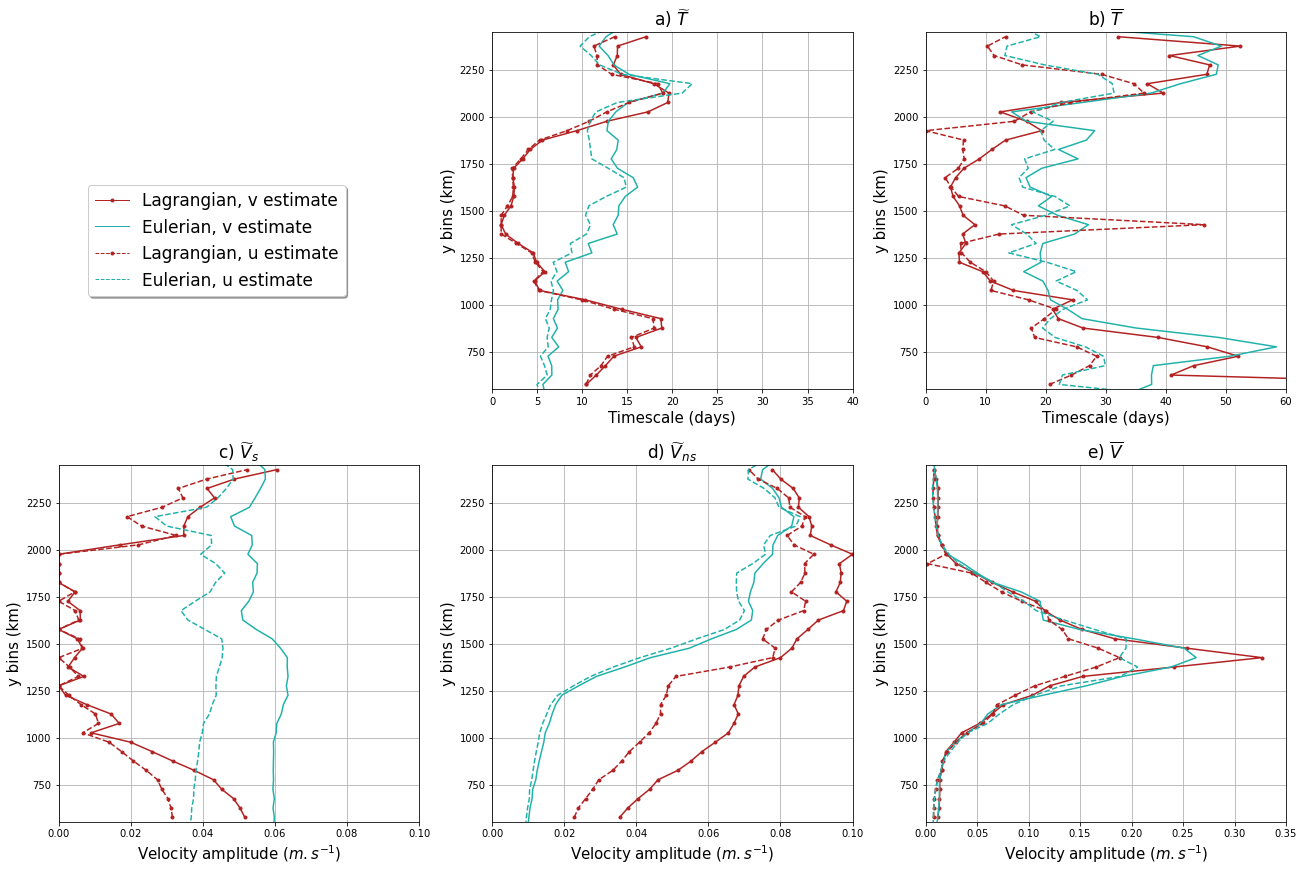

In [11]:
ymax = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.max()
ymin = dsv2[-2]['L_v_avg'].dropna(dim='ybin').ybin.min()
lims_uu = [(0,40),(0,40),(0,0.1),(0,0.1),(0,0.2)]
lims_vv = [(0,40),(0,60),(0,0.1),(0,0.1),(0,0.35)]
title = [r'a) $\widetilde{T}$',r'b) $\overline{T}$',r'd) $\widetilde{V}_{ns}$',r'c) $\widetilde{V}_{s}$',r'e) $\overline{V}$']
labels=[r'Timescale (days)',r'Timescale (days)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)',r'Velocity amplitude ($m.s^{-1}$)']
size= 15

axes = []

fig = plt.figure(constrained_layout=True,figsize=(18,12))
spec = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

ax = fig.add_subplot(spec[0,2:4])
axes.append(ax)
dsv2[-2]['L_v_avg'].sel(param='Tt').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param='Tt').plot(y='ybin',c=ce,ax=ax,linestyle='-')
dsv2[-2]['L_u_avg'].sel(param='Tt').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
dsv2[-2]['E_u_avg'].sel(param='Tt').plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[0,4:])
axes.append(ax)
dsv2[-2]['L_v_avg'].sel(param='Tb').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
dsv2[-2]['E_v_avg'].sel(param='Tb').plot(y='ybin',c=ce,ax=ax,linestyle='-')
dsv2[-2]['L_u_avg'].sel(param='Tb').plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
dsv2[-2]['E_u_avg'].sel(param='Tb').plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[1,2:4])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_ns')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_ns')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_ns')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[1,:2])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xt_s')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xt_s')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xt_s')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')


ax = fig.add_subplot(spec[1,4:])
axes.append(ax)
np.sqrt(dsv2[-2]['L_v_avg'].sel(param='Xb')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='-')
np.sqrt(dsv2[-2]['E_v_avg'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='-')
np.sqrt(dsv2[-2]['L_u_avg'].sel(param='Xb')).plot(y='ybin',c=cl,ax=ax,marker='.',linestyle='--')
np.sqrt(dsv2[-2]['E_u_avg'].sel(param='Xb')/2).plot(y='ybin',c=ce,ax=ax,linestyle='--')

label_legend = ['Lagrangian, v estimate','Eulerian, v estimate','Lagrangian, u estimate','Eulerian, u estimate']

custom_lines = [Line2D([0], [0], color=cl, lw=1,marker='.'),
                Line2D([0], [0], color=ce, lw=1),
                Line2D([0], [0], color=cl, lw=1,marker='.',linestyle='--'),
                Line2D([0], [0], color=ce, lw=1,linestyle='--')]
for i,ax in enumerate(axes):
    ax.grid();ax.set_ylim(ymin-25,ymax+25)
    ax.set_xlim(lims_vv[i]);ax.set_title(title[i],fontsize=size+2)
    ax.set_xlabel(labels[i],fontsize=size);ax.set_ylabel('y bins (km)',fontsize=size)
#    ax.legend(custom_lines[:], label_legend[:])
fig.legend(custom_lines, label_legend, bbox_to_anchor=((0.27,0.8)),fontsize=size+2,fancybox=True,shadow=True)
plt.show()
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure5.pdf',bbox_inches='tight')


Caption : Estimated eulerian (blue lines) and lagrangian (red lines with circular markers) non-stationarity, $\widetilde{T}$ (a) and decorrelation of the balanced flow, $\overline{T}$ (b) timescales and fast and slow components amplitudes, $\widetilde{V}_{ns}$ (c), $\widetilde{V}_{s}$ (d) and $\overline{V}$ (e).The estimates are found by fitting the theoretical model (ref equation) to the autocorrelation of u (dashed lines) and v (continuous lines).

### Figure 6 : 

In [12]:
number = len(dsv1)
cmap_Ta = plt.get_cmap('Greys')
cmap = plt.get_cmap('YlOrBr')
colors_Ta = [cmap_Ta(i) for i in np.linspace(0.5, 1, number)]
colors = [cmap(i) for i in np.linspace(0.3, 1, number)]
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
                ]



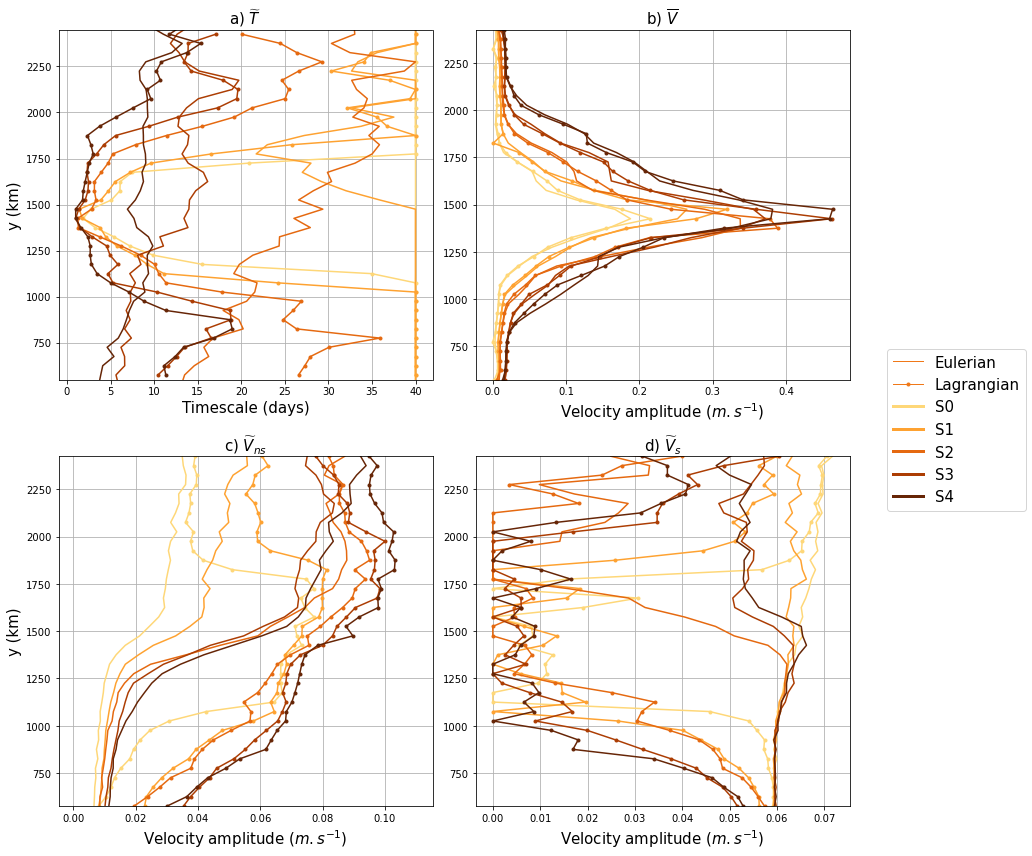

In [118]:
lims_vv = [(0,40),(0,0.35),(0,0.12),(0,0.12)]
V = '_v_avg'

fig,ax = plt.subplots(2,2,figsize=(12,12))

#for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims_vv[:2],axes[0,:]):
labels = ['Eulerian','Lagrangian']
cmap = plt.get_cmap('YlOrBr')
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
               ]
ymax = np.min([d['L'+V].dropna(dim='ybin').ybin.max() for d in dsv2])
ymin = np.max([d['L'+V].dropna(dim='ybin').ybin.min() for d in dsv2])
for i,d in enumerate(dsv2):
    d['L_v_avg'].sel(param='Tt').plot(y='ybin',c=colors[i],ax=ax[0,0],marker='.')
    d['E_v_avg'].sel(param='Tt').plot(y='ybin',c=colors[i],ax=ax[0,0])
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('S%s'% i)
    if i!=3:
        (np.sqrt(2*d['L_v_avg'].sel(param='Xb'))).plot(y='ybin',c=colors[i],ax=ax[0,1],marker='.')
        (np.sqrt(2*d['E_v_avg'].sel(param='Xb'))).plot(y='ybin', c=colors[i],ax=ax[0,1])
    else:
        (np.sqrt(2*d['L_v_avg'].sel(param='Xb'))).plot(y='ybin',c=colors[i],ax=ax[0,1],marker='.')
        (np.sqrt(2*d['E_v_avg'].sel(param='Xb')/2)).plot(y='ybin', c=colors[i],ax=ax[0,1])
    
    for a,pa,title in zip(ax[1,:],['Xt_ns','Xt_s'],[r'c) $\widetilde{V}_{ns}$',r'd) $\widetilde{V}_{s}$']):
        if i!=3:
            (np.sqrt(d['L_v_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=a,marker='.')
            (np.sqrt(d['E_v_avg'].sel(param=pa))).plot(y='ybin', c=colors[i],ax=a)
        else:
            (np.sqrt(d['L_v_avg'].sel(param=pa))).plot(y='ybin',c=colors[i],ax=a,marker='.')
            (np.sqrt(d['E_v_avg'].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=a)
        a.grid();a.set_title(title,fontsize=size);a.set_ylabel('');
        a.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)',fontsize=size)
        a.set_ylim(ymin,ymax)
        #a.legend(custom_lines,labels)
    ax[0,0].set_ylabel('y (km)',fontsize=size);ax[1,0].set_ylabel('y (km)',fontsize=size);
    ax[0,0].grid();ax[0,1].grid();ax[0,1].set_ylabel('')
    ax[0,0].set_xlabel('Timescale (days)',fontsize=size);ax[0,1].set_xlabel('Velocity amplitude ($m.s^{-1}$)',fontsize=size)
    #;ax[0,1].legend(custom_lines, labels)
    ax[0,0].set_title(r'a) $\widetilde{T}$',fontsize=size);ax[0,1].set_title(r'b) $\overline{V}$',fontsize=size)
    ax[0,0].set_ylim(ymin-25,ymax+25);ax[0,1].set_ylim(ymin,ymax)
fig.legend(custom_lines, labels, bbox_to_anchor=((1.2,0.6)),fontsize=size)
fig.tight_layout()
plt.show()
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure6.pdf',bbox_inches='tight')

Caption : Estimated parameters for five simulations. (a) Lagrangian and eulerian internal tides nonstationary timescales, $\widetilde{T}$. Fast components nonstationary and stationary velocity amplitudes, $\widetilde{V}_{ns}$ (c) and $\widetilde{V}_s$ (d). Slow component velocity amplitude, $\overline{V}$ (b) is also represented. Timescales lower than 1 day and larger than 40 days were not allowed by our fitting procedure.

### Additional figure : same as figure 6 but with estimation from autocovariance of u

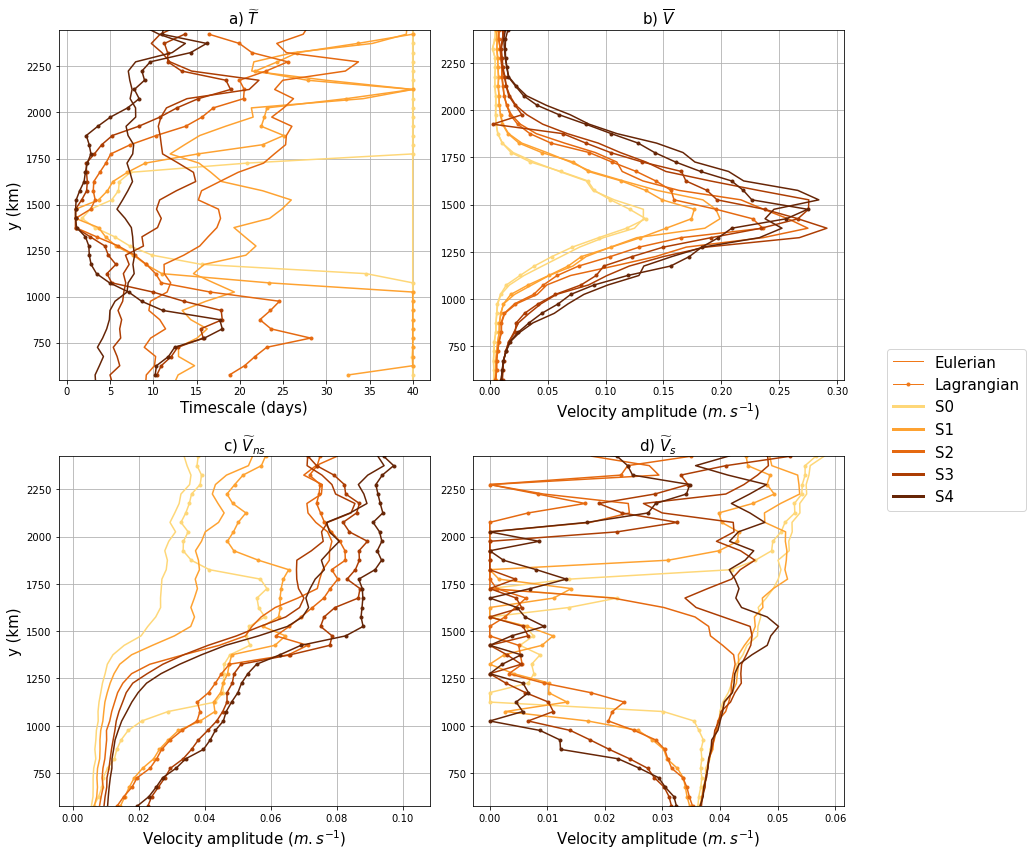

In [117]:
lims_vv = [(0,40),(0,0.35),(0,0.12),(0,0.12)]
V = '_u_avg'

fig,ax = plt.subplots(2,2,figsize=(12,12))

#for pa,title,lim,ax in zip(['Tt','Tb'],titles[:2],lims_vv[:2],axes[0,:]):
labels = ['Eulerian','Lagrangian']
cmap = plt.get_cmap('YlOrBr')
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=1),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
               ]
ymax = np.min([d['L'+V].dropna(dim='ybin').ybin.max() for d in dsv2])
ymin = np.max([d['L'+V].dropna(dim='ybin').ybin.min() for d in dsv2])
for i,d in enumerate(dsv2):
    d['L'+V].sel(param='Tt').plot(y='ybin',c=colors[i],ax=ax[0,0],marker='.')
    d['E'+V].sel(param='Tt').plot(y='ybin',c=colors[i],ax=ax[0,0])
    custom_lines.append(Line2D([0], [0], color=colors[i], lw=3))
    labels.append('S%s'% i)
    if i!=3:
        (np.sqrt(2*d['L'+V].sel(param='Xb'))).plot(y='ybin',c=colors[i],ax=ax[0,1],marker='.')
        (np.sqrt(2*d['E'+V].sel(param='Xb'))).plot(y='ybin', c=colors[i],ax=ax[0,1])
    else:
        (np.sqrt(2*d['L'+V].sel(param='Xb'))).plot(y='ybin',c=colors[i],ax=ax[0,1],marker='.')
        (np.sqrt(2*d['E'+V].sel(param='Xb')/2)).plot(y='ybin', c=colors[i],ax=ax[0,1])
    
    for a,pa,title in zip(ax[1,:],['Xt_ns','Xt_s'],[r'c) $\widetilde{V}_{ns}$',r'd) $\widetilde{V}_{s}$']):
        if i!=3:
            (np.sqrt(d['L'+V].sel(param=pa))).plot(y='ybin',c=colors[i],ax=a,marker='.')
            (np.sqrt(d['E'+V].sel(param=pa))).plot(y='ybin', c=colors[i],ax=a)
        else:
            (np.sqrt(d['L'+V].sel(param=pa))).plot(y='ybin',c=colors[i],ax=a,marker='.')
            (np.sqrt(d['E'+V].sel(param=pa)/2)).plot(y='ybin', c=colors[i],ax=a)
        a.grid();a.set_title(title,fontsize=size);a.set_ylabel('');
        a.set_xlabel(r'Velocity amplitude ($m.s^{-1}$)',fontsize=size)
        a.set_ylim(ymin,ymax)
        #a.legend(custom_lines,labels)
    ax[0,0].set_ylabel('y (km)',fontsize=size);ax[1,0].set_ylabel('y (km)',fontsize=size);
    ax[0,0].grid();ax[0,1].grid();ax[0,1].set_ylabel('')
    ax[0,0].set_xlabel('Timescale (days)',fontsize=size);ax[0,1].set_xlabel('Velocity amplitude ($m.s^{-1}$)',fontsize=size)
    #;ax[0,1].legend(custom_lines, labels)
    ax[0,0].set_title(r'a) $\widetilde{T}$',fontsize=size);ax[0,1].set_title(r'b) $\overline{V}$',fontsize=size)
    ax[0,0].set_ylim(ymin-25,ymax+25);ax[0,1].set_ylim(ymin,ymax)
fig.legend(custom_lines, labels, bbox_to_anchor=((1.2,0.6)),fontsize=size)
fig.tight_layout()
plt.show()
#fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/params_paper_V2.pdf',bbox_inches='tight')

In [11]:
def phi_mu(tau,Tbar):
    return 1-np.exp(-tau/Tbar)
def phi_sigma(tau,Tbar):
    return 1-2*(1-np.exp(-tau/Tbar))*Tbar/tau+(1-np.exp(-2*tau/Tbar))*Tbar/(2*tau)

In [12]:
def t1(tau,T):
    return tau/T
def t2(tau,Tb,Lt,U):
    return Tb**2*phi_mu(tau,Tb)**2*(2*np.pi/Lt)**2*(U*3600*24)**2
def t3(tau,Tb,Lt,U):
    return tau*(2*np.pi/Lt)**2*(U*3600*24)**2*Tb*phi_sigma(tau,Tb)

In [13]:
def Ctilde(tau,T,Tb,Lt,U,Xt_ns,Xt_s):
    return (Xt_s+Xt_ns*np.exp(-t1(tau,T)))*np.exp(-t2(tau,Tb,Lt,U)-t3(tau,Tb,Lt,U))
def C_fit(tau,Tt,Xt_ns,Xt_s):
    return Xt_s+Xt_ns*np.exp(-tau/Tt)

In [14]:
def T2(tau,Tb,Lt,U):
    return Tb**2*(2*np.pi/Lt)**2*(U*3600*24)**2*(tau/Tb-phi_mu(tau,Tb))
def Cth(tau,T,Tb,Lt,U,Xt_ns,Xt_s):
    return (Xt_s+Xt_ns*np.exp(-t1(tau,T)))*np.exp(-T2(tau,Tb,Lt,U))

In [18]:
Te_v2 = [xr.merge([d.E_u_avg.sel(param='Tt'),d.E_v_avg.sel(param='Tt')]) for d in dsv2]
Tl_v2 = [xr.merge([d.L_u_avg.sel(param='Tt'),d.L_v_avg.sel(param='Tt')]) for d in dsv2]
Tbe_v2 = [xr.merge([d.E_u_avg.sel(param='Tb'),d.E_v_avg.sel(param='Tb')]) for d in dsv2]
Tbl_v2 = [xr.merge([d.L_u_avg.sel(param='Tb'),d.L_v_avg.sel(param='Tb')]) for d in dsv2]
Xbl_v2 = [xr.merge([d.L_u_avg.sel(param='Xb'),d.L_v_avg.sel(param='Xb')]) for d in dsv2]
Xbe_v2 = [xr.merge([d.E_u_avg.sel(param='Xb'),d.E_v_avg.sel(param='Xb')]) for d in dsv2]



In [19]:
vmodes = [xr.open_dataset(file) for file in sorted(glob(path+'wp*/'+'ZC_waves_modes*'))] #local
Lt = [vm.lwave.sel(mode=1)*1e3 for vm in vmodes]
Ltilde = [L.assign_coords({'y_bins' : L.y_rho*1e-3}) for L in Lt]
Lt_mean = [L.groupby_bins('y_bins',Xbe_v2[i]['E_v_avg'].ybin+25,include_lowest=False).mean() for i,L in enumerate(Ltilde)]
Ltilde_mean = [Ltm.assign_coords({'y_bins_bins':[yy.mid for yy in Ltm.y_bins_bins.values]}).rename({'y_bins_bins':'ybin'}) for Ltm in Lt_mean]


In [17]:
Xbe_v2[-2] = Xbe_v2[-2]/2
Xbl_v2[-2] = Xbl_v2[-2]/2

In [20]:
V = '_v_avg'

C_fits_L = [C_fit(Tau,Tl_v2[i]['L'+V],dsv2[i]['L'+V].sel(param='Xt_ns'),dsv2[i]['L'+V].sel(param='Xt_s')) for i in range(len(dsv2))]
C_fits_E = [C_fit(Tau,Te_v2[i]['E'+V],dsv2[i]['E'+V].sel(param='Xt_ns'),dsv2[i]['E'+V].sel(param='Xt_s')) for i in range(len(dsv2))]
C_th_E = [Ctilde(Tau,Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L'+V]),dsv2[i]['E'+V].sel(param='Xt_ns'),dsv2[i]['E'+V].sel(param='Xt_s')) for i in range(len(dsv2))]
C_th_L = [Ctilde(Tau,Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L'+V]),dsv2[i]['L'+V].sel(param='Xt_ns'),dsv2[i]['L'+V].sel(param='Xt_s')) for i in range(len(dsv2))]

CthL = [Ctilde(Tau,Te_v2[i]['E'+V],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L'+V]),dsv2[i]['E'+V].sel(param='Xt_ns'),dsv2[i]['E'+V].sel(param='Xt_s')) for i in range(len(dsv2))]
for i in range(len(dsv2)):
    if i!=2:
        C_fits_L[i] = C_fits_L[i].drop('time_instant') 
        C_fits_E[i] = C_fits_E[i].drop('time_instant') 
        C_th_E[i] = C_th_E[i].drop('time_instant') 
        C_th_L[i] = C_th_L[i].drop('time_instant') 
        CthL[i] = CthL[i].drop('time_instant') 
    if i==3:
        C_th_E[i] = C_th_E[i]/2
        C_fits_E[i] = C_fits_E[i]/2
        C_th_L[i] = C_th_L[i]/2
        CthL[i] = CthL[i]/2

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

In [21]:
C_fit_L = xr.concat(C_fits_L,dim='wp')
C_fit_E = xr.concat(C_fits_E,dim='wp')
C_th_E = xr.concat(C_th_E,dim='wp')
C_th_L = xr.concat(C_th_L,dim='wp')
CthL = xr.concat(CthL,dim='wp')
C_comp = xr.Dataset(data_vars = {'fit_L':C_fit_L,'fit_E':C_fit_E,'th_E':C_th_E,'th_L':C_th_L,'th':CthL},coords={'tau':C_fit_E.tau.values,'wp':np.arange(0,5),'ybin':C_fit_E.ybin.values})



### Figure 7 : 

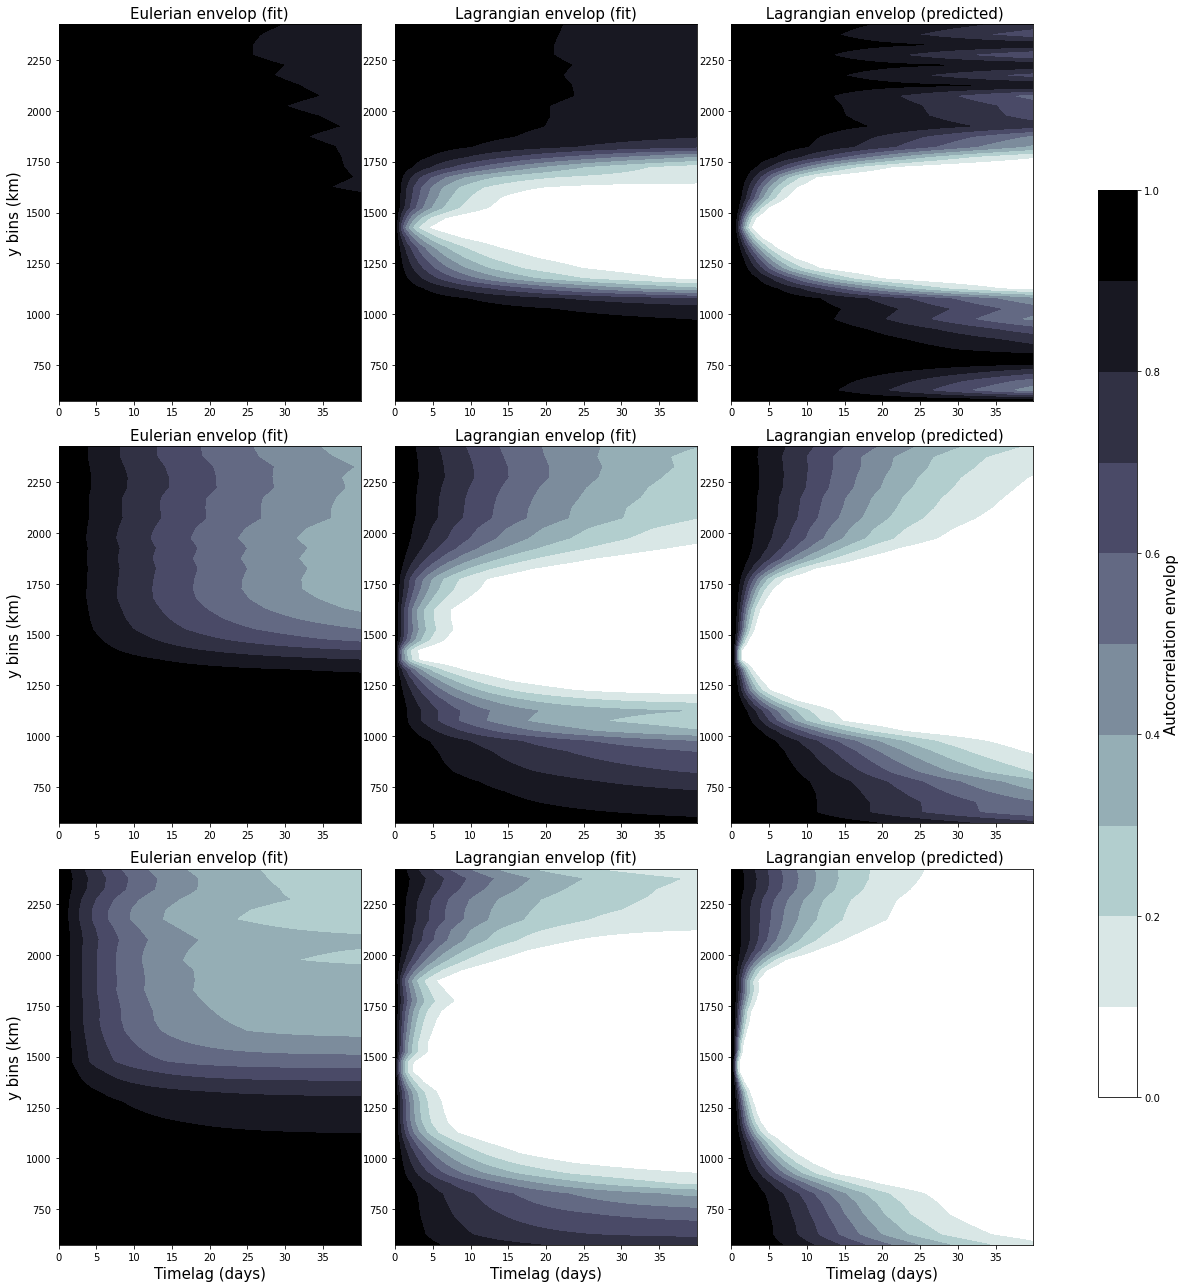

In [121]:
size = 15
cmap = 'bone_r'
lev=11
fig,axs = plt.subplots(3,3,figsize=(18,18))
for i,S in enumerate(C_comp.wp.values[::2]):
    ax = axs[i,:]
    m = 0#np.min([C_comp.fit_E.sel(wp=S).min(),C_comp.fit_L.sel(wp=S).min(),C_comp.th_E.sel(wp=S).min()])
    M = 1#np.max([C_comp.fit_E.sel(wp=S).max(),C_comp.fit_L.sel(wp=S).max(),C_comp.th_E.sel(wp=S).max()])
    im = (C_comp.fit_E.sel(wp=S)/C_comp.fit_E.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[0],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.fit_L.sel(wp=S)/C_comp.fit_L.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[1],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.th_E.sel(wp=S)/C_comp.th_E.sel(wp=S).isel(tau=1)).plot.contourf(ax=ax[2],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
     
    for a,title in zip(ax,['Eulerian envelop (fit)','Lagrangian envelop (fit)',' Lagrangian envelop (predicted)']):
        a.set_xlabel('',fontsize=size);a.set_ylim(C_comp.fit_L.dropna(dim='ybin').ybin.min(),C_comp.fit_L.dropna(dim='ybin').ybin.max())
        a.set_title(title,fontsize=size);a.set_ylabel('')
    ax[0].set_ylabel('y bins (km)',fontsize=size)
axs[2,0].set_xlabel('Timelag (days)',fontsize=size);axs[2,1].set_xlabel('Timelag (days)',fontsize=size);
axs[2,2].set_xlabel('Timelag (days)',fontsize=size)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Autocorrelation envelop',size=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure7.pdf',bbox_inches='tight')

Caption : Amplitude of the envelop of fast oscillation in autocorrelation functions for 3 simulations (corresponding to rows i the figure). From top to bottom the jet's strength increases. The envelop of the fitted Eulerian (left column) and Lagrangian (middle column) autocorrelation as well as the predicted Lagrangian autocorrelation (right column) are plotted.

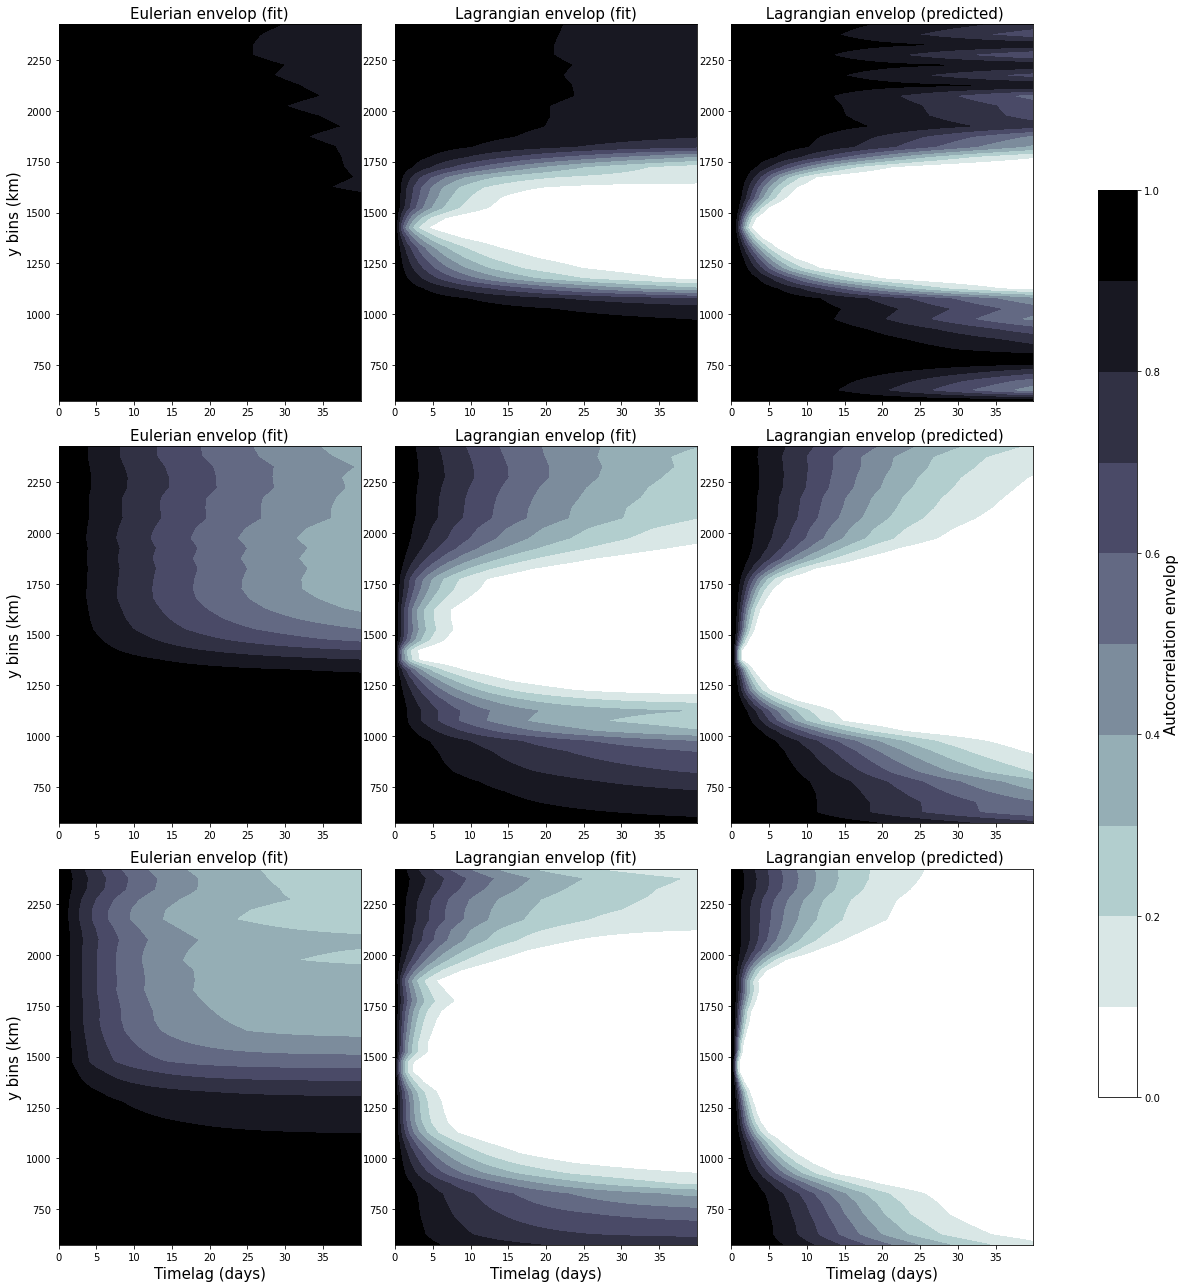

In [57]:
size = 15
cmap = 'bone_r'
lev=11
fig,axs = plt.subplots(3,3,figsize=(18,18))
for i,S in enumerate(C_comp.wp.values[::2]):
    ax = axs[i,:]
    m = 0#np.min([C_comp.fit_E.sel(wp=S).min(),C_comp.fit_L.sel(wp=S).min(),C_comp.th_E.sel(wp=S).min()])
    M = 1#np.max([C_comp.fit_E.sel(wp=S).max(),C_comp.fit_L.sel(wp=S).max(),C_comp.th_E.sel(wp=S).max()])
    im = (C_comp.fit_E.sel(wp=S)/C_comp.fit_E.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[0],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.fit_L.sel(wp=S)/C_comp.fit_L.sel(wp=S).isel(tau=0)).plot.contourf(ax=ax[1],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
    (C_comp.th.sel(wp=S)/C_comp.th.sel(wp=S).isel(tau=1)).plot.contourf(ax=ax[2],vmin=m,vmax=M,cmap=cmap,levels=lev,add_colorbar=False)
     
    for a,title in zip(ax,['Eulerian envelop (fit)','Lagrangian envelop (fit)',' Lagrangian envelop (predicted)']):
        a.set_xlabel('',fontsize=size);a.set_ylim(C_comp.fit_L.dropna(dim='ybin').ybin.min(),C_comp.fit_L.dropna(dim='ybin').ybin.max())
        a.set_title(title,fontsize=size);a.set_ylabel('')
    ax[0].set_ylabel('y bins (km)',fontsize=size)
axs[2,0].set_xlabel('Timelag (days)',fontsize=size);axs[2,1].set_xlabel('Timelag (days)',fontsize=size);
axs[2,2].set_xlabel('Timelag (days)',fontsize=size)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cb = fig.colorbar(im, cax=cbar_ax)
cb.set_label('Autocorrelation envelop',size=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure7_bis.pdf',bbox_inches='tight')

### Figure 8

In [24]:
terms1 = [t1(Tl_v2[i]['L_v_avg'],Te_v2[i]['E_v_avg']) for i in range(len(dsv2))]
terms2 = [t2(Tl_v2[i]['L_v_avg'],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]
terms2_bis = [T2(Tl_v2[i]['L_v_avg'],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]


terms3 = [t3(Tl_v2[i]['L_v_avg'],Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

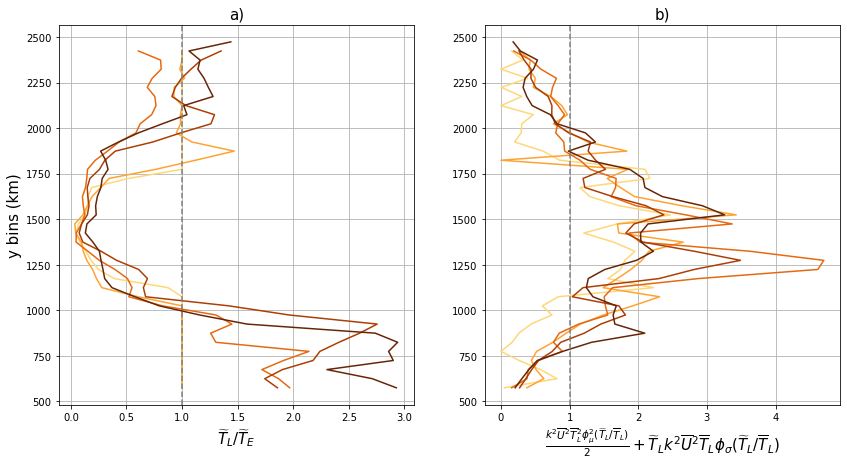

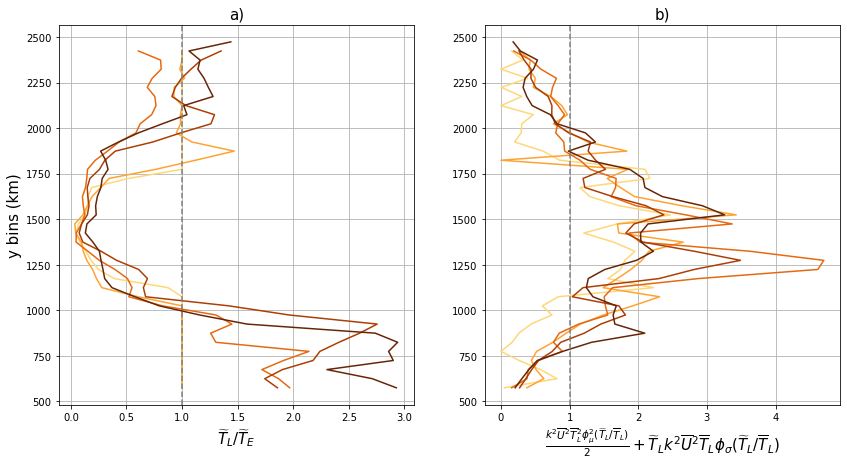

In [124]:
#Figure paper : 
size=15
for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,2,figsize=(14,7))
    for i,d in enumerate(dsv2):
        #x1 = Tl_v2[i]['L'+V]/Te_v2[i]['E'+V]
        #x2 = Tbl_v2[i]['L'+V]**2*phi_mu(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])**2*(2*np.pi/Ltilde_mean[i])**2*(2*Xbe_v2[i]['E_v_avg']*(3600*24)**2)
        #x3 = (2*np.pi/Ltilde_mean[i])**2*(2*Xbe_v2[i]['E_v_avg']*(3600*24)**2)*Tl_v2[i]['L'+V]*Tbl_v2[i]['L'+V]*phi_sigma(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])
        #x4 = Tl_v2[i]['L'+V]/Tbl_v2[i]['L'+V]
        x1 = terms1[i]
        x2 = terms2[i]+terms3[i]
        x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
    ax[0].grid();ax[1].grid();
    ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--')
    ax[0].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    ax[1].set_xlabel(r'$\frac{k^2\overline{U}^2\overline{T}_L^2\phi_{\mu}^2(\widetilde{T}_L/\overline{T}_L)}{2}+\widetilde{T}_Lk^2\overline{U}^2\overline{T}_L\phi_{\sigma}(\widetilde{T}_L/\overline{T}_L)$',fontsize=size);
    ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
    ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure8.pdf',bbox_inches='tight')
#    fig.savefig('/Users/zcaspar/Documents/Figures/Correlation_th/t1t2'+V[:2]+'_v2.pdf')

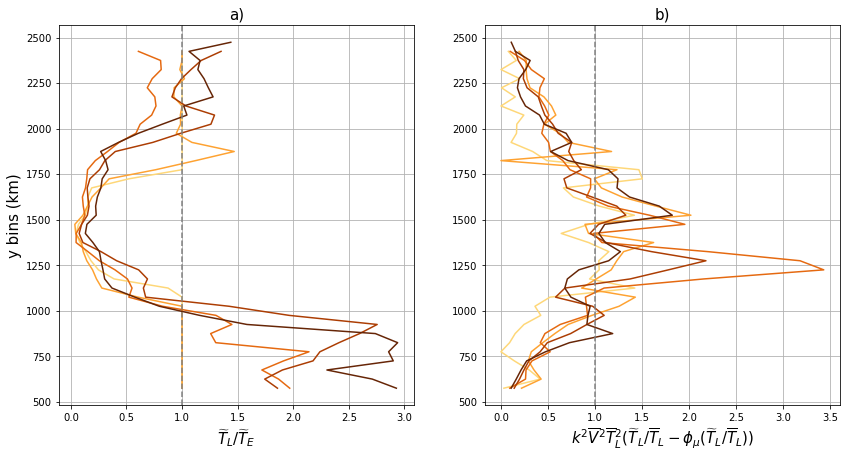

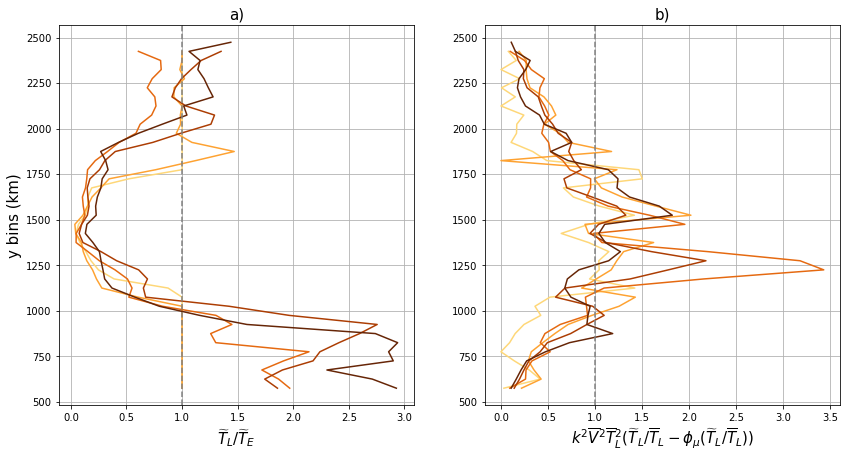

In [56]:
size=15
for V in ['_u_avg','_v_avg']:
    fig,ax = plt.subplots(1,2,figsize=(14,7))
    for i,d in enumerate(dsv2):
        #x1 = Tl_v2[i]['L'+V]/Te_v2[i]['E'+V]
        #x2 = Tbl_v2[i]['L'+V]**2*phi_mu(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])**2*(2*np.pi/Ltilde_mean[i])**2*(2*Xbe_v2[i]['E_v_avg']*(3600*24)**2)
        #x3 = (2*np.pi/Ltilde_mean[i])**2*(2*Xbe_v2[i]['E_v_avg']*(3600*24)**2)*Tl_v2[i]['L'+V]*Tbl_v2[i]['L'+V]*phi_sigma(Tl_v2[i]['L'+V],Tbl_v2[i]['L'+V])
        #x4 = Tl_v2[i]['L'+V]/Tbl_v2[i]['L'+V]
        x1 = terms1[i]
        x2 = terms2_bis[i]
        x1.plot.line('-',ax=ax[0],y='ybin',c=colors[i])
        x2.plot.line('-',ax=ax[1],y='ybin',c=colors[i])
    ax[0].grid();ax[1].grid();
    ax[0].axvline(1,c='grey',linestyle='--');ax[1].axvline(1,c='grey',linestyle='--')
    ax[0].set_xlabel(r'$\widetilde{T}_L/\widetilde{T}_E$',fontsize=size);
    ax[1].set_xlabel(r'$k^2\overline{V}^2\overline{T}_L^2(\widetilde{T}_L/\overline{T}_L-\phi_{\mu}(\widetilde{T}_L/\overline{T}_L))$',fontsize=size);
    ax[0].set_ylabel('y bins (km)',fontsize=size);ax[1].set_ylabel('')
    ax[0].set_title('a)',fontsize=size);ax[1].set_title('b)',fontsize=size)
fig.savefig('/Users/zcaspar/Documents/Figures/Figures_paper/Figure8_bis.pdf',bbox_inches='tight')

### Figs supp:

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


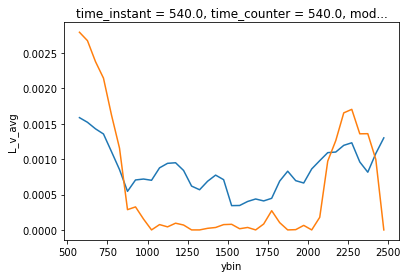

In [71]:
(dsv2[-1]['E_v_avg'].sel(param='Xt_s')/2*np.exp(-terms2_bis[-1])).plot()
dsv2[-1]['L_v_avg'].sel(param='Xt_s').plot()

#(dsv2[-1]['E_v_avg'].sel(param='Xt_ns')/2*np.exp(-Tl_v2[-1]['L_v_avg']/Te_v2[-1]['E_v_avg'])*np.exp(-terms2_bis[-1])).plot()
#dsv2[-1]['L_v_avg'].sel(param='Xt_ns').plot()

In [25]:
terms1_2D = [t1(Tau,Te_v2[i]['E_v_avg']) for i in range(len(dsv2))]
terms2_2D = [t2(Tau,Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]
terms2_2D_bis = [T2(Tau,Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]
terms3_2D = [t3(Tau,Tbl_v2[i]['L'+V],Ltilde_mean[i],np.sqrt(2*Xbl_v2[i]['L_v_avg'])) for i in range(len(dsv2))]

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive 

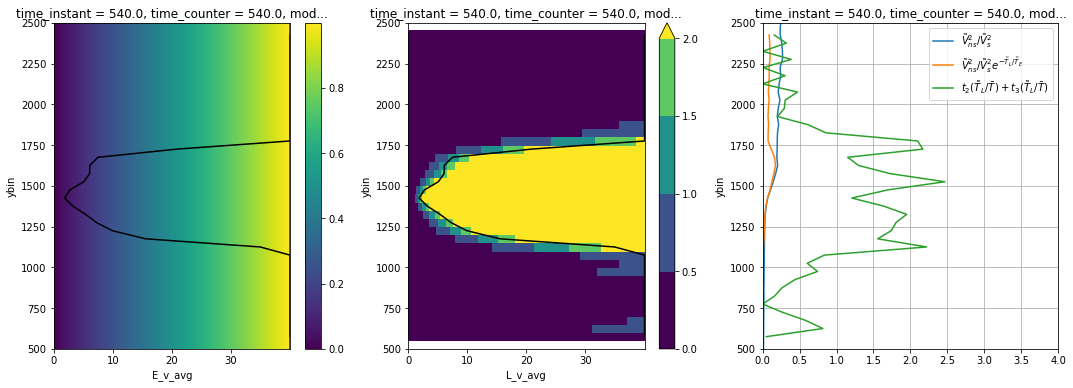

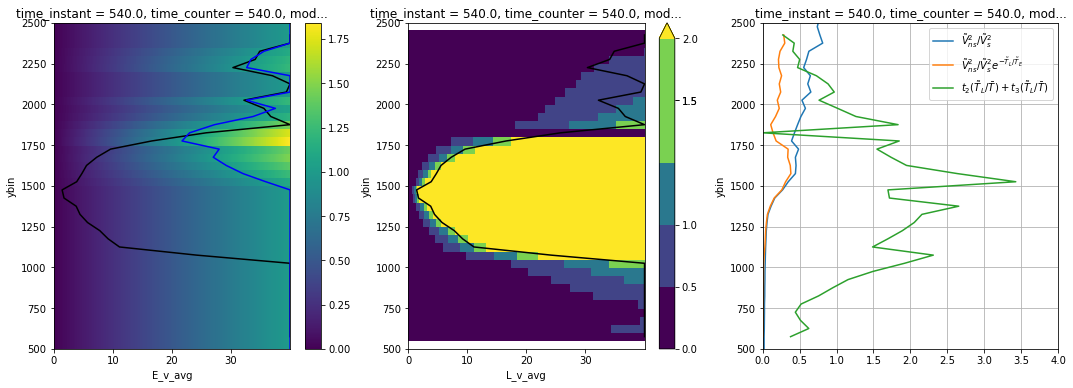

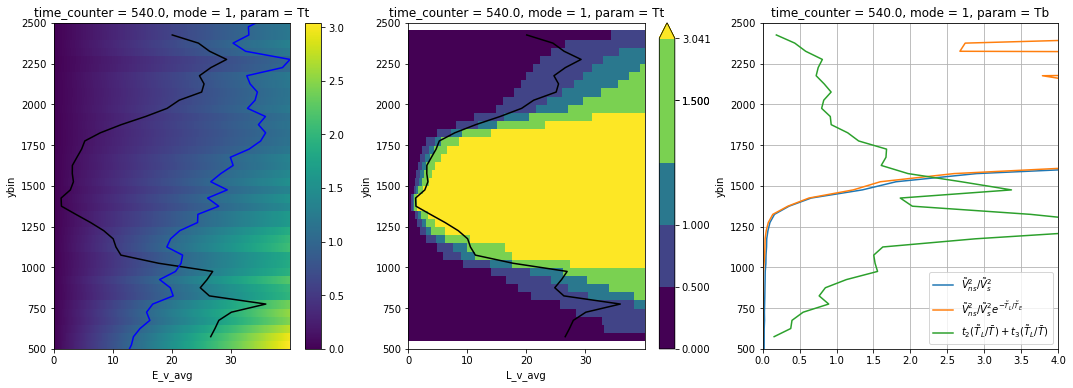

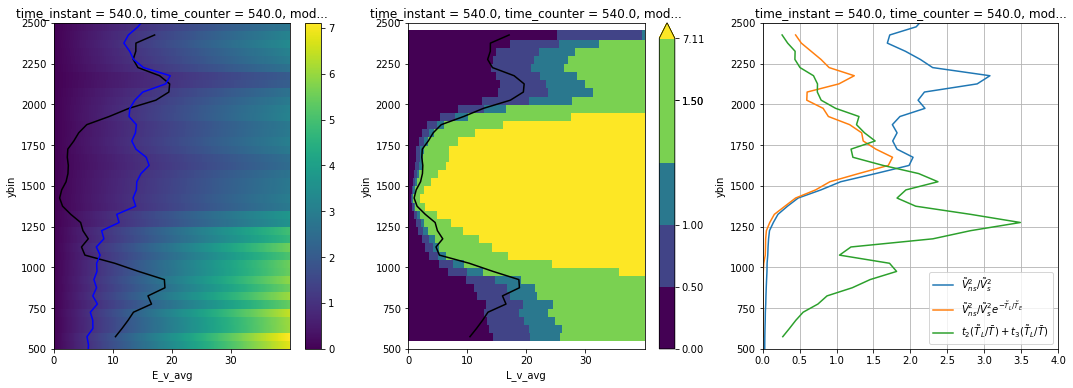

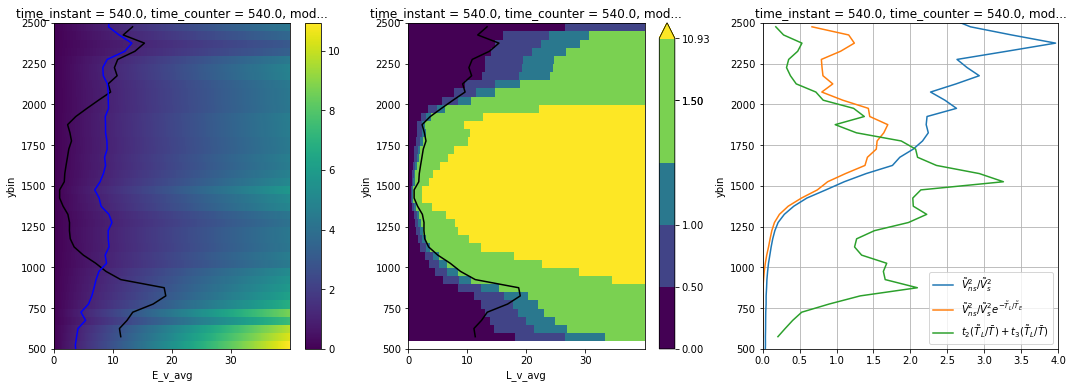

In [26]:
for i in range(len(dsv2)):
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    terms1_2D[i].sel(ybin=slice(500,2500)).plot(y='ybin',ax=ax[0])
    Tl_v2[i]['L_v_avg'].plot(y='ybin',c='k',ax=ax[0])
    Te_v2[i]['E_v_avg'].plot(y='ybin',c='b',ax=ax[0])
    t1_max = terms1_2D[i].sel(ybin=slice(500,2500)).max().values
    if i ==0:
        levs = [0,0.5,t1_max,1.5,2] 
    else : 
        levs = [0,0.5,1,1.5,np.min([1.5,t1_max,2]),np.max([t1_max,2])]
    (terms2_2D[i].sel(ybin=slice(500,2500))+terms3_2D[i].sel(ybin=slice(500,2500))).plot(y='ybin',ax=ax[1],levels=levs)
    Tl_v2[i]['L_v_avg'].plot(y='ybin',c='k',ax=ax[1])
    (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2$')
    (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')*np.exp(-Tl_v2[i]['L_v_avg']/Te_v2[i]['E_v_avg'])).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2 e^{-\tilde T_L/\tilde T_E}$')
    (terms2[i]+terms3[i]).plot(ax=ax[2],y='ybin',label=r'$t_2(\tilde T_L/\bar T)+t_3(\tilde T_L/\bar T)$')
    ax[2].grid();ax[2].set_ylim(500,2500);ax[2].set_xlim(0,4);ax[2].legend()

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive = ax.pcolormesh(x, y, z, **kwargs)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/plot/plot.py:959: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  primitive 

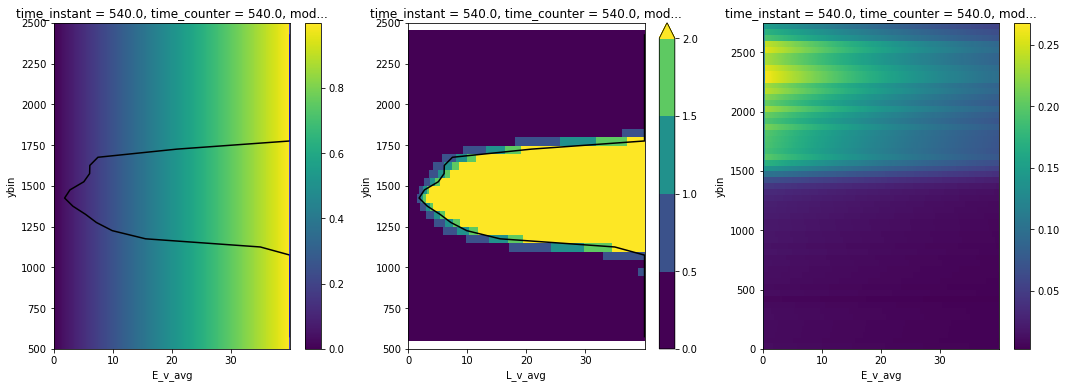

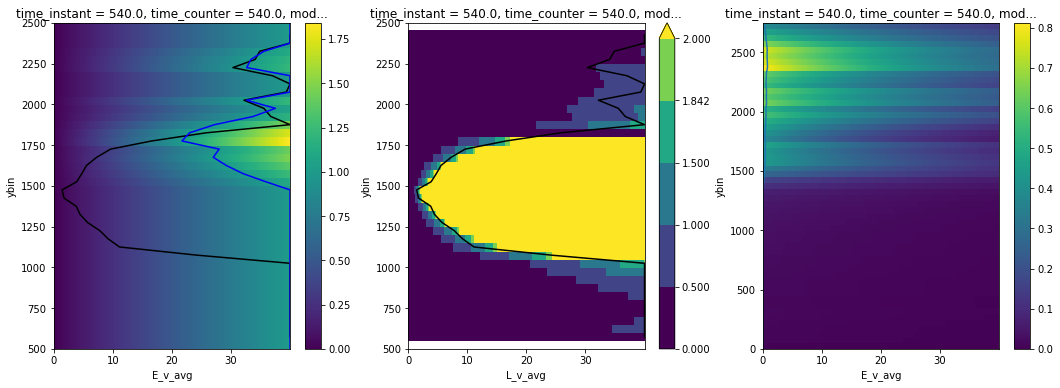

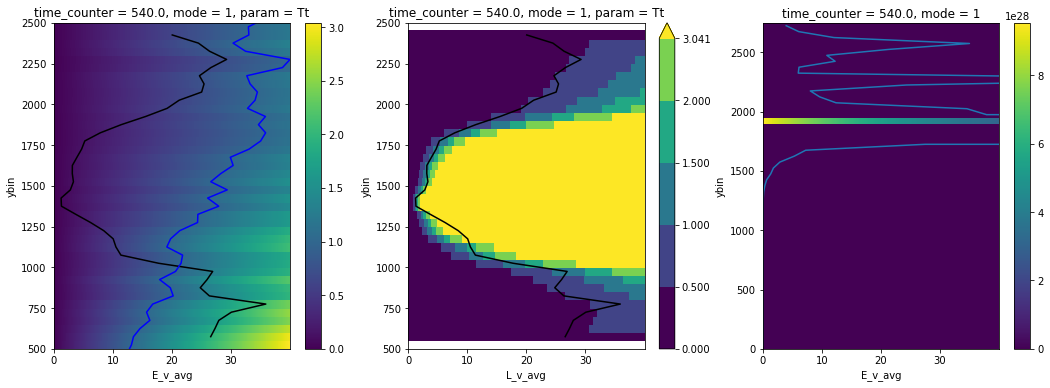

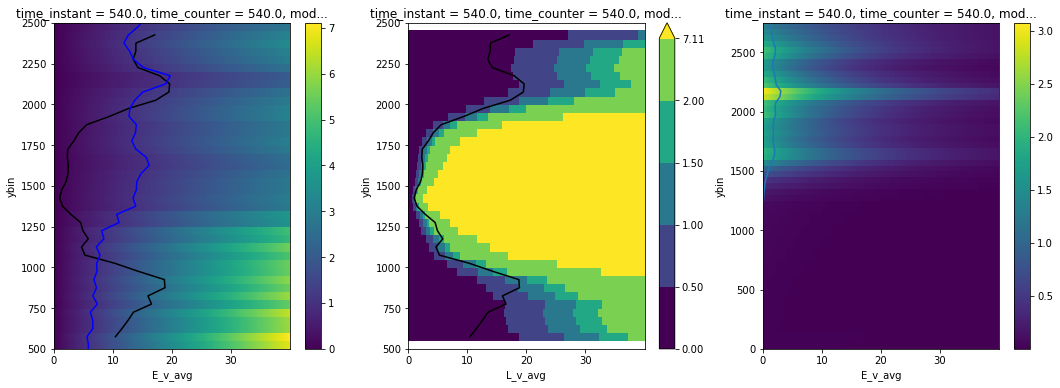

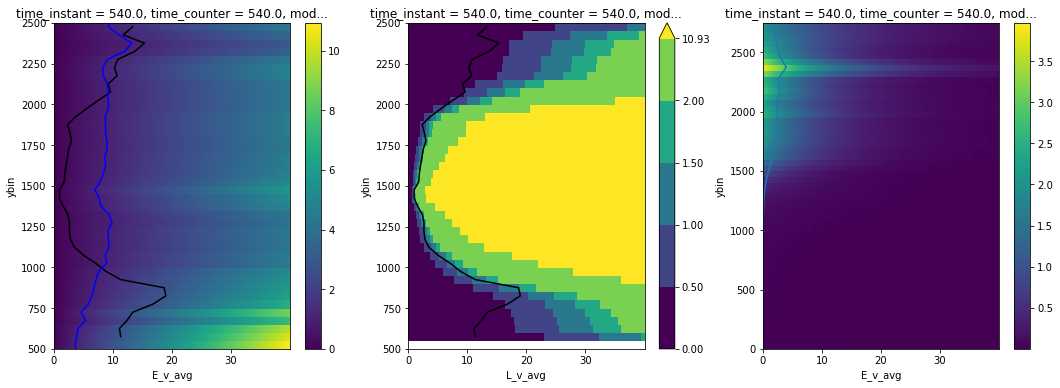

In [53]:
for i in range(len(dsv2)):
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    terms1_2D[i].sel(ybin=slice(500,2500)).plot(y='ybin',ax=ax[0])
    Tl_v2[i]['L_v_avg'].plot(y='ybin',c='k',ax=ax[0])
    Te_v2[i]['E_v_avg'].plot(y='ybin',c='b',ax=ax[0])
    t1_max = terms1_2D[i].sel(ybin=slice(500,2500)).max().values
    if i ==0:
        levs = [0,0.5,t1_max,1.5,2] 
    else : 
        levs = [0,0.5,1,1.5,np.min([t1_max,2]),np.max([t1_max,2])]
    #levs=50
    (terms2_2D_bis[i].sel(ybin=slice(500,2500))+terms3_2D[i].sel(ybin=slice(500,2500))).plot(y='ybin',ax=ax[1],levels=levs)
    Tl_v2[i]['L_v_avg'].plot(y='ybin',c='k',ax=ax[1])
    (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')*np.exp(-Tau/Te_v2[i]['E_v_avg'])).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2 e^{-\tilde T_L/\tilde T_E}$')
    (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2$')
 #   (dsv2[i]['E_v_avg'].sel(param='Xt_ns')/dsv2[i]['E_v_avg'].sel(param='Xt_s')*np.exp(-Tl_v2[i]['L_v_avg']/Te_v2[i]['E_v_avg'])).plot(ax=ax[2],y='ybin',label=r'$\tilde V_{ns}^2/\tilde V_s^2 e^{-\tilde T_L/\tilde T_E}$')
#    (terms2_bis[i]).plot(ax=ax[2],y='ybin',label=r'$t_2(\tilde T_L/\bar T)$')
#    ax[2].grid();ax[2].set_ylim(500,2500);ax[2].set_xlim(0,4);ax[2].legend()

### Comments : 
$S_4$ : $\tau/ \tilde T_E$\

$t_2$ : smal

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

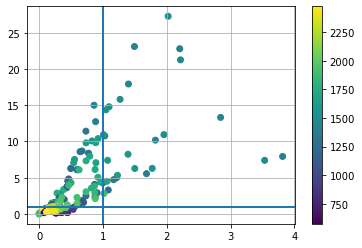

In [48]:
for i in range(len(dsv2)):
    k = 2*np.pi/Ltilde_mean[i]
    Vbar = np.sqrt(Xbl_v2[i]['L_v_avg'])*3600*24
    Tbar = np.sqrt(Tbl_v2[i]['L_v_avg'])
    Tt = Te_v2[i]['E_v_avg']
    plt.scatter(k*Vbar*Tbar,k*Vbar*Tt,c=k.ybin.values)
    plt.grid();plt.axvline(1);plt.axhline(1);
plt.colorbar()

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)
/opt/anaconda3/envs/croco/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureW

Text(0, 0.5, '$k\\bar V \\tilde T_E$')

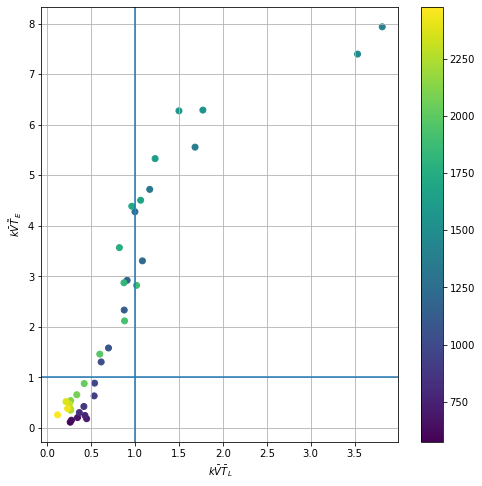

In [51]:
i=-1
plt.figure(figsize=(8,8))
k = 2*np.pi/Ltilde_mean[i]
Vbar = np.sqrt(Xbl_v2[i]['L_v_avg'])*3600*24
Tbar = np.sqrt(Tbl_v2[i]['L_v_avg'])
Tt = Te_v2[i]['E_v_avg']
plt.scatter(k*Vbar*Tbar,k*Vbar*Tt,c=k.ybin.values)
plt.grid();plt.axvline(1);plt.axhline(1);
plt.colorbar();plt.xlabel(r'$k\bar V \bar T_L$');plt.ylabel(r'$k\bar V \tilde T_E$')